# K-Means Clustering of country risk data

In [38]:
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

from sklearn.cluster import KMeans

In [39]:
raw = pd.read_csv("countryriskdata.csv")
print("Size of Data : ", raw.shape)
print(raw.head(5))

Size of Data :  (122, 6)
     Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          39  1.867  3.822       3.403
1    Algeria     DZ          34  2.213  4.160       4.202
2  Argentina     AR          36  1.957  4.568      -2.298
3    Armenia     AM          33  2.218  4.126       0.208
4  Australia     AU          79  1.465  8.244       2.471


In [40]:
raw.describe()

,Corruption,Peace,Legal,GDP Growth
count,122.000000,122.000000,122.000000,122.000000
mean,46.237705,2.003730,5.598861,2.372566
std,19.126397,0.447826,1.487328,3.241424
min,14.000000,1.192000,2.728000,-18.000000
25%,31.250000,1.684750,4.571750,1.432250
50%,40.000000,1.969000,5.274000,2.496000
75%,58.750000,2.280500,6.476750,4.080000
max,90.000000,3.399000,8.633000,7.958000


In [41]:
raw.corr(numeric_only=True)

,Corruption,Peace,Legal,GDP Growth
Corruption,1.000000,-0.700477,0.923589,0.102513
Peace,-0.700477,1.000000,-0.651961,-0.199855
Legal,0.923589,-0.651961,1.000000,0.123440
GDP Growth,0.102513,-0.199855,0.123440,1.000000


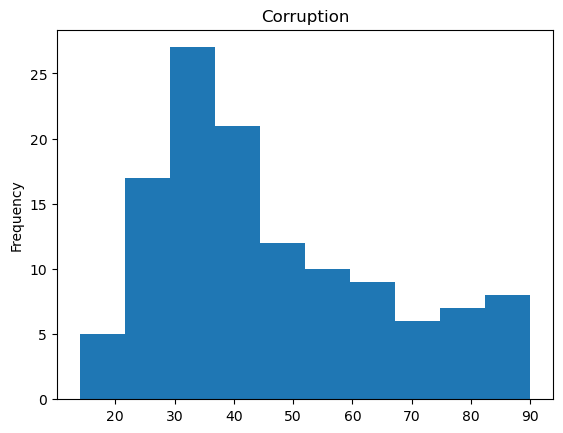

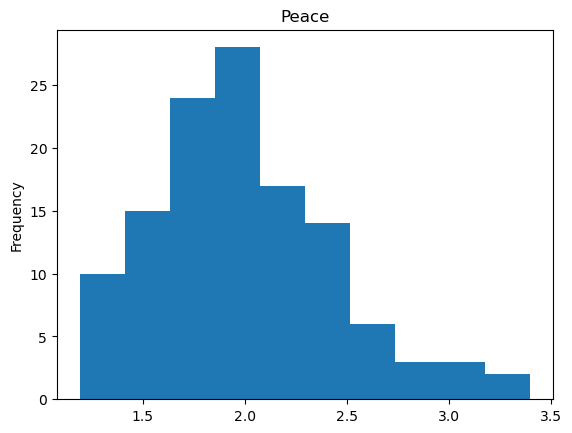

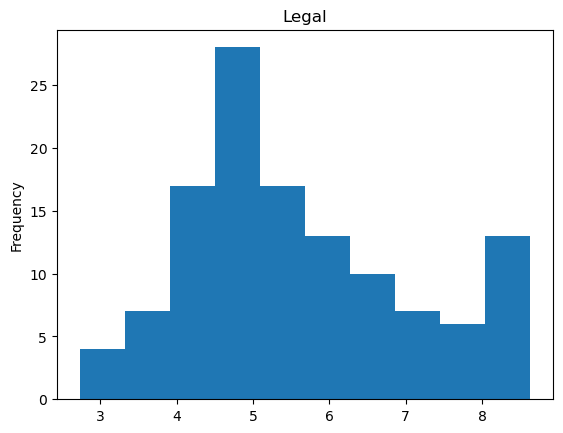

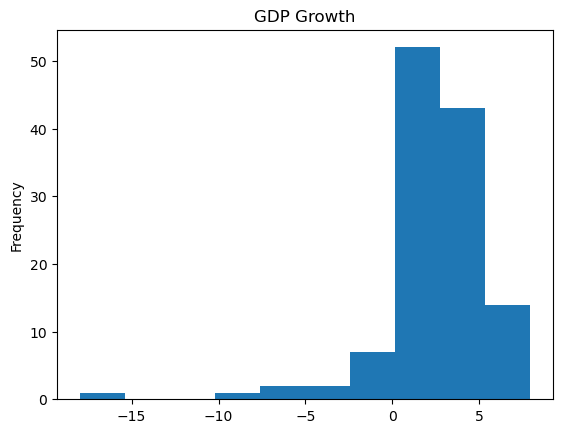

In [42]:
plt.figure(1)
raw['Corruption'].plot(kind='hist',title='Corruption')

plt.figure(2)
raw['Peace'].plot(kind='hist',title='Peace')

plt.figure(3)
raw['Legal'].plot(kind='hist',title='Legal')

plt.figure(4)
raw['GDP Growth'].plot(kind='hist',title='GDP Growth')

plt.show()

In [43]:
# Legal and Corruption are highly correlated , Hence we drop Legal to get better results !!
X = raw[['Corruption','Peace','GDP Growth']] 
X = (X - X.mean())/X.std() # Standardization Approach

print(X.head(5))

   Corruption     Peace  GDP Growth
0   -0.378414 -0.305319    0.317896
1   -0.639833  0.467304    0.564392
2   -0.535266 -0.104348   -1.440899
3   -0.692117  0.478469   -0.667782
4    1.712936 -1.202990    0.030368


c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

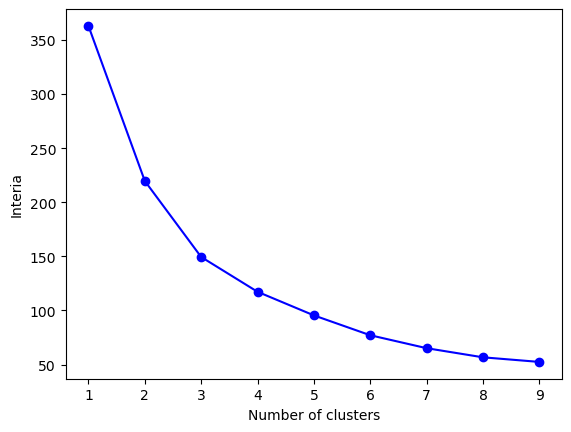

In [44]:
# Perform Elbow method to get the value of K
K = range(1,10)
inertia = [KMeans(i, n_init=10).fit(X).inertia_ for i in K]

fig = plt.figure()
plt.plot(K,inertia,'-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Interia')
plt.show()

In [45]:
K = 3
kmeans = KMeans(n_clusters = K,random_state = 0, n_init=10)
kmeans.fit(X)

# print intertia and cluster centre
print("inertia for k=3 is",kmeans.inertia_)
print("cluster centres:",kmeans.cluster_centers_)

centers = kmeans.cluster_centers_
y = kmeans.labels_
print(y)

c:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


inertia for k=3 is 149.39319664703328
cluster centres: [[-0.57038169  0.41411127  0.35197405]
 [ 1.11642586 -0.91416986  0.02513005]
 [-0.99156039  1.13436536 -2.24436217]]
[0 0 2 0 1 1 2 0 0 1 0 0 0 1 2 0 2 0 1 2 1 0 0 1 1 1 1 0 1 0 2 0 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 2 1 0 0 0 0 0 0 1 1 1 1 2 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 2 0 0
 0 0 1 1 1 1 2 0 2 0 0]


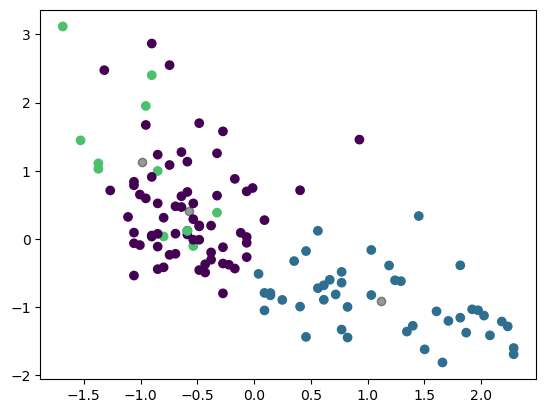

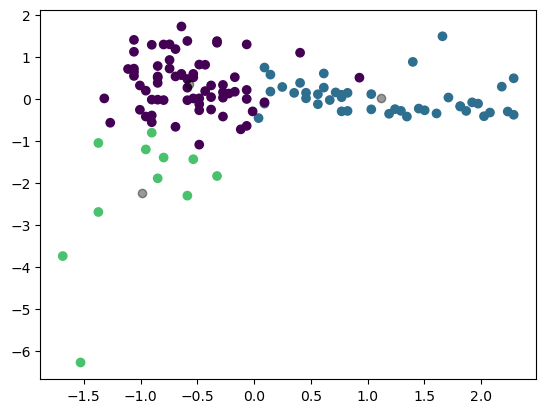

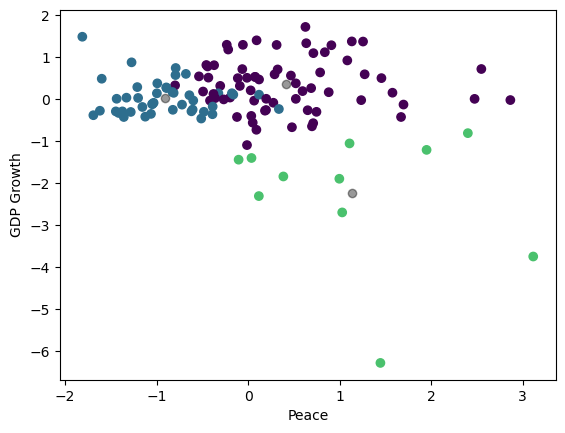

In [46]:
# 3 2D graphs for clustering
import matplotlib.pyplot as plt
figs = [(0,1),(0,2),(1,2)]
labels = ['Corruption','Peace','GDP Growth', 'Legal']

norm = clrs.Normalize(vmin=0,vmax=y.max()+0.8)
cmap = cm.viridis

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]],X.iloc[:,figs[i][1]],c=cmap(norm(y)))
    plt.scatter(centers[:,figs[i][0]],centers[:,figs[i][1]], c='black',alpha=0.4)

plt.xlabel(labels[figs[i][0]])
plt.ylabel(labels[figs[i][1]])

plt.show()

In [47]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
0                         Albania     AL      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
69                         Mexico     MX      0
67                     Mauritania     MR      0
66                           Mali     ML      0
64                         Malawi     MW      0
74                          Nepal     NP      0
63                     Madagascar     MG      0
120                        Zambia     ZM      0
58                         Kuwait     KW      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
54                         Jordan     JO      0
52                        Jamaica     JM      0
50                         Israel     IL      0
48                           Iran     ID      0
61                        Liberia     LR